In [1]:
# Import Neccessary Libraries
# Loading the Dataset with converting into dataframe
# Shape,convert target variable into bool
# plot target varibale to see class balance
# data.describe()
# plot boxplot to see the flow of varibale "Operating Profit Rate" against target variable
# plotting the correlation between independent variable
# Due to lot of multicollinearity issue, skewed features, and data imbalance, it is not
# good idea to use regression model,rather than use Decision tree..
# Split into X and Y.
# Train Test Split
# Now for class imbalance in target variable, we will use under/over sampling method to see who is best fit.
# Now fit all three data ( original x_train y_train, x_train_under y_train_under, x_train_over y_train_over)
# Run a for loop to use all three fitted model to predict. 
# print Accuracy Now as per the accuracy print confusion matrix.
# By using ConfusionMatrixDisplay print confusion matrix result.
# Determine the depth of decision tree.
# print/get Feature importance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
df=pd.DataFrame(df)
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [4]:
df.shape

(6819, 95)

In [5]:
df['Bankrupt'] = df['Bankrupt'].astype(bool)

<AxesSubplot:ylabel='Bankrupt'>

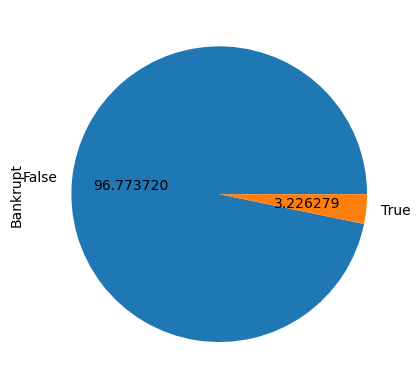

In [6]:
df['Bankrupt'].value_counts().plot.pie(autopct='%2f')

In [7]:
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.000000,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.000000,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.000000,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

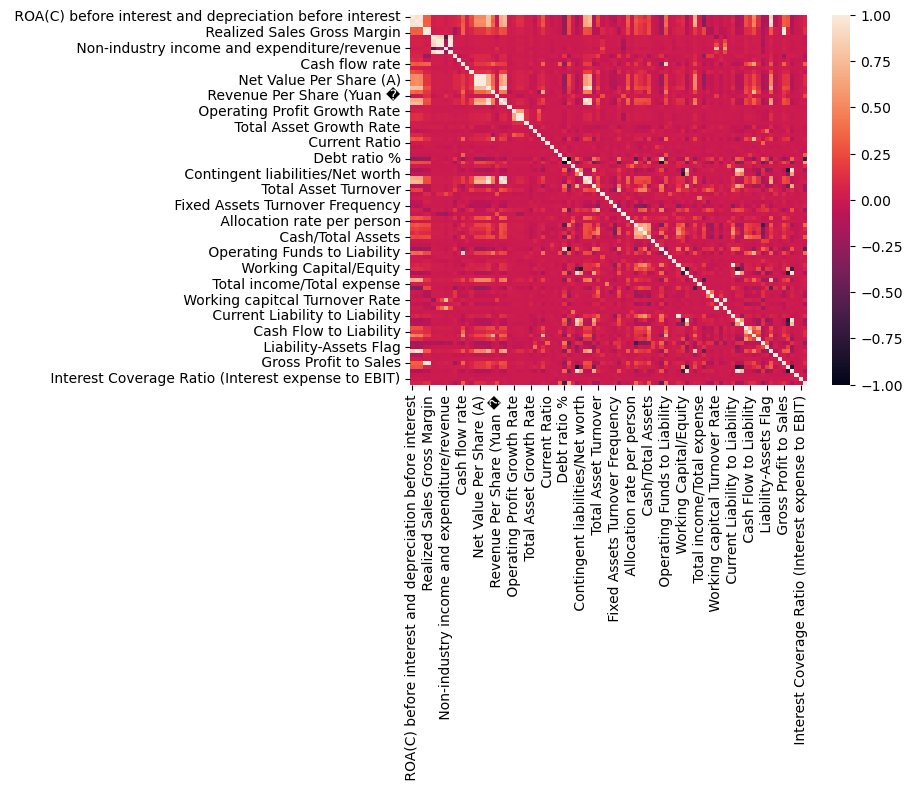

In [8]:
# Look for correlation of features in df (we drop bankrupt since its the target - and it is a boolean so not going to work anyway)
corr= df.drop(columns="Bankrupt").corr()
sns.heatmap(corr)

In [9]:
# due to lot of multicollinearity issues, skewed features, and the data is imbalanced. 
# performing regression is bad idea here, better go with Decision Tree classifier
target= "Bankrupt"
x=df.drop(columns=target)
y=df[target]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5114, 94), (5114,), (1705, 94), (1705,))

In [12]:
y_train.value_counts()

False    4952
True      162
Name: Bankrupt, dtype: int64

In [13]:
undersampler=RandomUnderSampler(random_state=42)
x_train_under, y_train_under = undersampler.fit_resample(x_train,y_train)
print(x_train_under.shape)

(324, 94)


In [14]:
oversampler=RandomOverSampler(random_state=42)
x_train_over, y_train_over = oversampler.fit_resample(x_train, y_train)
print(x_train_over.shape)

(9904, 94)


In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy: ", round(acc_baseline, 4))
#it is very high because the data is imbalanced

Baseline Accuracy:  0.9683


In [16]:
model_reg = DecisionTreeClassifier(random_state=42)
model_reg.fit(x_train,y_train)

model_under = DecisionTreeClassifier(random_state=42)
model_under.fit(x_train_under,y_train_under)

model_over = DecisionTreeClassifier(random_state=42)
model_over.fit(x_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [17]:
for m in [model_reg,model_under,model_over]:
    acc_train = m.score(x_train, y_train)
    acc_test = m.score(x_test, y_test)
    
    print("Training Accuracy: ", round(acc_train, 4))
    print("Test Accuracy: ", round(acc_test, 4))

Training Accuracy:  1.0
Test Accuracy:  0.9548
Training Accuracy:  0.8357
Test Accuracy:  0.8387
Training Accuracy:  1.0
Test Accuracy:  0.9507


In [18]:
# Training Accuracy:  1.0
# Test Accuracy:  0.9548
# Training Accuracy:  0.8357
# Test Accuracy:  0.8387
# Training Accuracy:  1.0
# Test Accuracy:  0.9507
#what we see above is that none of them beat the baseline but over sampling score is much better.

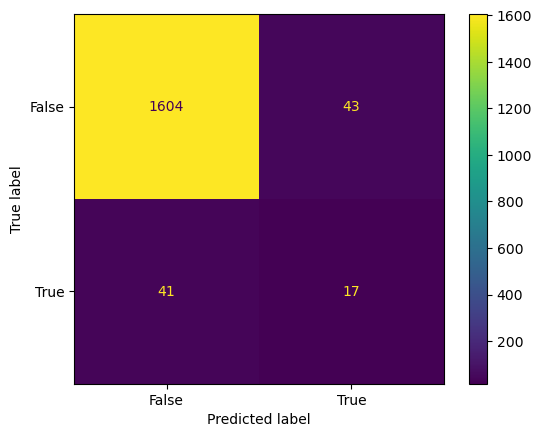

In [19]:
ConfusionMatrixDisplay.from_estimator(model_over, x_test,y_test)

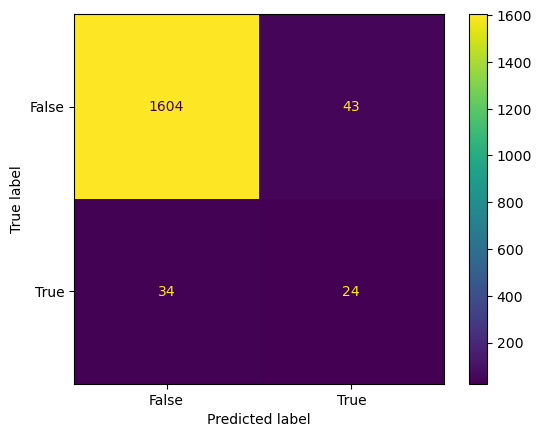

In [20]:
ConfusionMatrixDisplay.from_estimator(model_reg, x_test,y_test)

In [21]:
depth= model_over.get_depth()
print(depth)

54


In [22]:
depth= model_reg.get_depth()
print(depth)

14


Text(0.5, 1.0, 'Model_over Feature Importance')

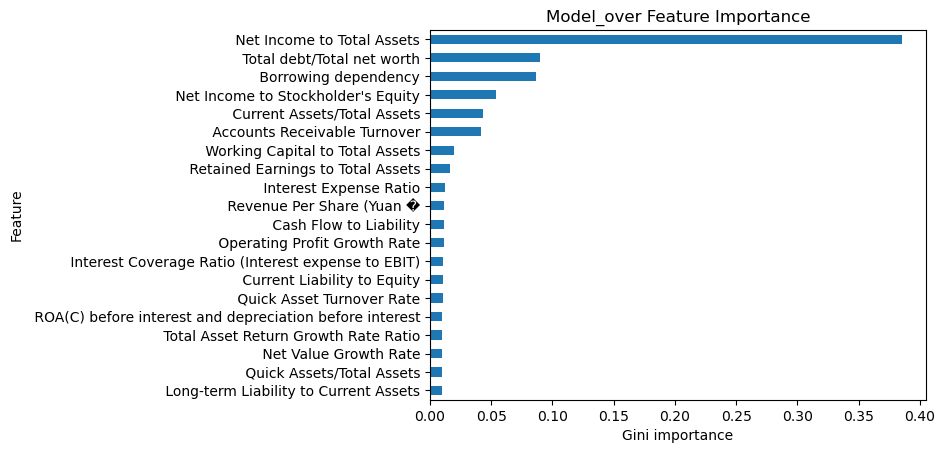

In [23]:
importances = model_over.feature_importances_
feat_imp = pd.Series(importances, index=x_train_over.columns).sort_values()

feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Gini importance')
plt.ylabel("Feature")
plt.title('Model_over Feature Importance')

Text(0.5, 1.0, 'Model_reg Feature Importance')

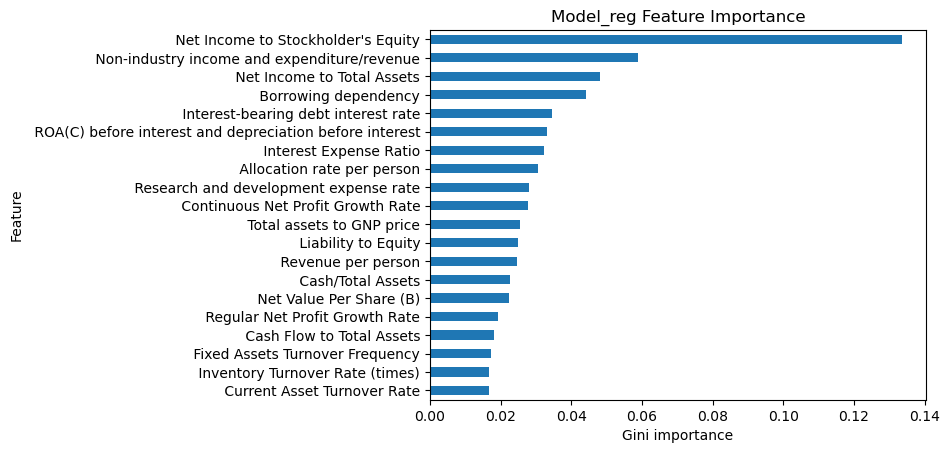

In [24]:
importances = model_reg.feature_importances_
feat_imp = pd.Series(importances, index=x_train.columns).sort_values()

feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Gini importance')
plt.ylabel("Feature")
plt.title('Model_reg Feature Importance')

# Try the same thing with RandomForestClassifier along with GridsearchCV.

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [27]:
params= {
    "n_estimators": range(25,100,25),
    "max_depth": range(10,70,10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [30]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(
        rfc,
        param_grid=params,
        cv=5,
        n_jobs=-1,
        verbose= 1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [31]:
model.fit(x_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [33]:
cv_results= pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,1.597245,0.017097,0.025003,0.007656,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992933,0.994952,0.996971,0.994952,0.997475,0.995457,0.001628,1
13,1.616141,0.031020,0.017098,0.001201,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.993438,0.995457,0.996466,0.994952,0.995960,0.995255,0.001039,2
11,2.381427,0.028657,0.030036,0.004001,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.991923,0.995962,0.994447,0.995962,0.996970,0.995053,0.001760,3
17,2.188760,0.071653,0.018752,0.006250,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.992428,0.994447,0.995457,0.994447,0.996465,0.994649,0.001339,4
14,2.419480,0.057307,0.028127,0.006251,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991418,0.994952,0.995457,0.995457,0.995960,0.994649,0.001646,5
9,0.806254,0.014987,0.009376,0.007655,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.993438,0.995457,0.995457,0.993438,0.995455,0.994649,0.000989,6
12,0.794125,0.003928,0.011416,0.006560,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.991923,0.995457,0.995457,0.992428,0.995960,0.994245,0.001707,7
8,2.418580,0.050592,0.029838,0.002827,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.991418,0.994447,0.994447,0.993942,0.995960,0.994043,0.001476,8
16,1.578205,0.046907,0.015272,0.004182,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.992933,0.993438,0.994952,0.992428,0.995960,0.993942,0.001316,9
15,0.805094,0.015973,0.012501,0.006250,60,25,"{'max_depth': 60, 'n_estimators': 25}",0.991923,0.995962,0.995457,0.992428,0.993939,0.993942,0.001596,10


In [34]:
model.best_params_

{'max_depth': 40, 'n_estimators': 50}

In [35]:
model.predict(x_train_over)

array([False, False, False, ...,  True,  True,  True])

In [37]:
acc_train = model.score(x_train_over, y_train_over)
acc_test = model.score(x_test, y_test)

print(f"Training Accuracy: ",{round(acc_train,4)})
print(f"Test Accuracy: ",{round(acc_test,4)})

Training Accuracy:  {1.0}
Test Accuracy:  {0.9672}


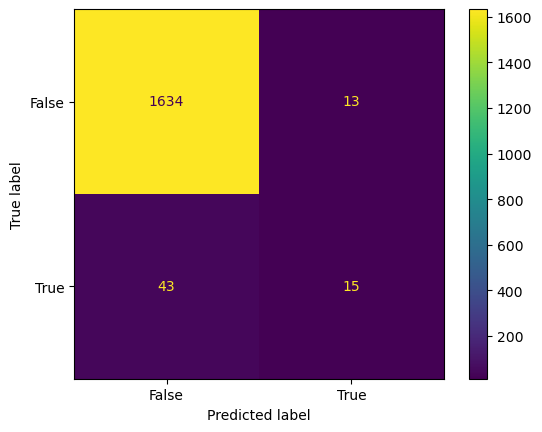

In [38]:
ConfusionMatrixDisplay.from_estimator(model, x_test,y_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1647
        True       0.54      0.26      0.35        58

    accuracy                           0.97      1705
   macro avg       0.76      0.63      0.67      1705
weighted avg       0.96      0.97      0.96      1705



In [41]:
features = x_test.columns
importances = model.best_estimator_.feature_importances_

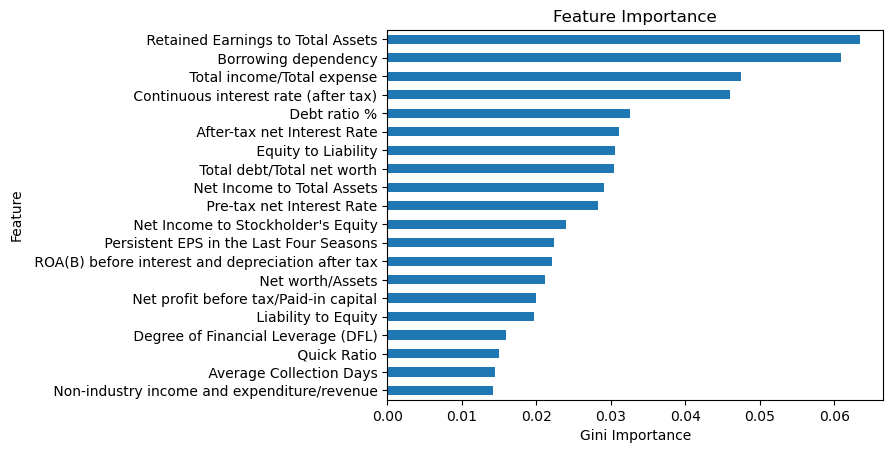

In [45]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(20).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");